In [3]:
import torch
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

In [4]:
fashion_mnist_train = FashionMNIST(
    root="FashionMNIST", train=True, download=True, transform=transforms.ToTensor()
)

In [5]:
fashion_mnist_test = FashionMNIST(
    root="FashionMNIST", train=False, download=True, transform=transforms.ToTensor()
)

In [6]:
batch_size = 128

train_dataloader = DataLoader(fashion_mnist_train, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(fashion_mnist_test, batch_size=batch_size, shuffle=True)

In [7]:
print(train_dataloader)
print(test_dataloader)

In [8]:
images, labels = next(iter(train_dataloader))
print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


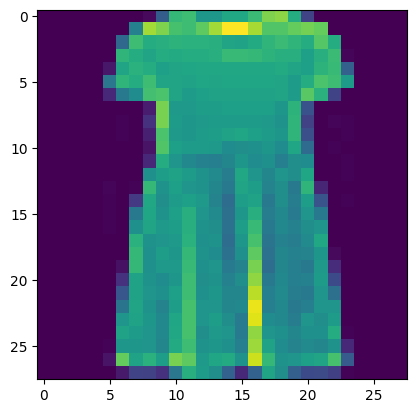

In [9]:
import matplotlib.pyplot as plt

plt.imshow(images[0][0])
plt.show()

In [10]:
labels[0]

tensor(3)

In [11]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [12]:
classes[labels[0].item()]

'Dress'

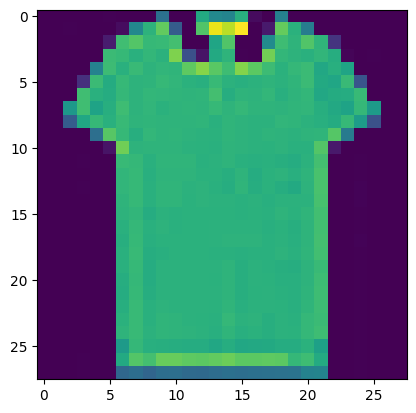

In [13]:
import matplotlib.pyplot as plt

plt.imshow(images[1][0])
plt.show()

In [14]:
labels[1]

tensor(0)

In [15]:
classes[labels[1].item()]

'T-shirt/top'

torch.Size([128, 1, 28, 28])
torch.Size([128])


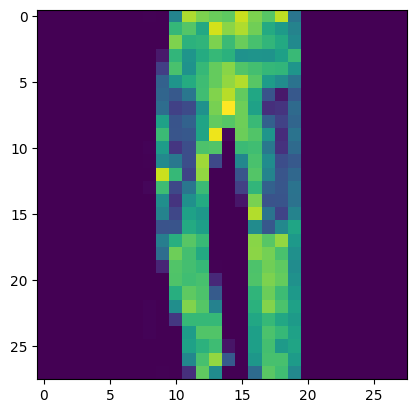

Trouser


In [18]:
images, labels = next(iter(test_dataloader))
print(images.shape)
print(labels.shape)

import matplotlib.pyplot as plt

plt.imshow(images[1][0])
plt.show()

print(classes[labels[1].item()])

In [20]:
import torch.nn as nn
import torch.optim as optim
import torch

In [26]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(
                in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0
            ),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(
                in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0
            ),
            nn.Conv2d(
                in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=0
            ),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        # 畳み込み層→全結合層への渡し方
        self.dense = nn.Sequential(
            nn.Linear(256, 128),
            nn.Dropout(p=0.2),
            nn.Linear(128, 128),
            nn.Dropout(p=0.2),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        out = self.conv_layers(x)
        out = out.view(out.size()[0], -1)
        out = self.dense(out)

        return out

In [27]:
net = CNN()

In [28]:
fake = torch.FloatTensor(8, 1, 28, 28)
net(fake).shape

torch.Size([8, 10])

In [34]:
net(images[0].unsqueeze(0))

tensor([[-0.0267, -0.0010, -0.0087, -0.1083,  0.0665,  0.0461, -0.0993,  0.0237,
          0.0912,  0.0191]], grad_fn=<AddmmBackward0>)

In [35]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [36]:
net = net.to(device)

In [38]:
images = images.to(device)
labels = labels.to(device)

In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)
epochs = 20
batch_size = 128

train_losses = []
train_accs = []
val_losses = []
val_accs = []

In [ ]:
import time

start = time.time()

for epoch in range(epochs):
    # 訓練モード
    net.train()

    train_loss = 0
    train_acc = 0